In [181]:
import pandas as pd
import plotly
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown

The goal of this notebook is to explore the study metrics (indicators) to identify those that have greater relation with the main goal of the project (highlighting women financial independence and decision-making rights).
In order to do that, we classify the indicators into the suggested categories:
- Mobile phone indicators – because this could be an empowering asset
- Financial inclusion indicators
- Indicators that look at control and decision-making
- Earning and spending
- Spouse work

For each category, we want to select one or two indicators to build a sentence that will serve as a summary of the category, guiding the users towards discovering what is 'most important' about each indicator category.
This sentence will be represented visually as a heatmap that compares the selected indicators, breaking the results down by gender.

In addition to the written and visual summaries, we are selecting two indicators that will be represented individually in indicator-specific widgets that the users will be able to explore by selecting the analyze/compare/change options in the widget.

In [6]:
#Load data, extract indicators
ken = pd.read_csv(, decimal=',', sep=';')
fields = list(ken.keys())

In [198]:
#Group fields into categories
hidden = ['InstanceID', 'finalweight', 'Own a phone', 'Language of interview', 'Province']

demo = ['Gender','Age Group', 'Education', 'Main language', 'English literacy',
       'Relationship status', '$2.50 PPP Poverty line', 'Mean household size', 
       'Urbanicity',  'Region']

phone = [' Phone ownership', 'Independent phone use']

financial_inc = ['Informal financial usage',
       'Mobile Money', 'Bank', 'Permission to open bank',
       'Money taken from account']

decision_mkg = ['Children decision maker', 
       'Spending decision maker', 'Savings goal decision maker',
       'Savings goal influence', 'Land ownership', 'Land decision maker']

earning_spending = ['Earning frequency','Possibility to raise 1/20 GNI (Gross National Income)']

work = ['Migrant worker identity', 'Permission to work',
         'Allow spouse to work,,', 'Main income earner',
        'Income frequency of spouse']

ind_lists = [hidden, demo, phone, financial_inc, decision_mkg, earning_spending, work]
ind_lists_labels = ['hidden', 'demo', 'phone', 'financial_inc', 'decision_mkg', 'earning_spending', 'work']

In [199]:
#Create overview dataframe with indicator categories, individual indicators, and their available options
overview = pd.DataFrame(columns=['cluster', 'field_name', 'option_count', 'options'])
for field in fields:
    for listname, listlabel in zip(ind_lists, ind_lists_labels):
        if field in listname:
            cluster = listlabel
    options = list(ken[field].unique())
    overview.loc[len(overview)+1]=[cluster, field, len(options), options]
overview

,cluster,field_name,option_count,options
1,hidden,InstanceID,3000,"[770458, 770459, 770471, 770485, 770486, 77049..."
2,hidden,finalweight,1141,"[10776.6614590281, 9983.31846506174, 16671.644..."
3,demo,Gender,2,"[Male, Female]"
4,demo,Relationship status,2,"[Married/relationship, Not married/relationship]"
5,demo,Urbanicity,2,"[Urban, Rural]"
6,demo,Age Group,5,"[25-34, 35-44, 18-24, 55+, 45-54]"
7,demo,Education,5,"[Secondary education, Primary education, Highe..."
8,demo,English literacy,5,"[Fair, Good, Excellent, Not at all, Poorly]"
9,hidden,Own a phone,2,"[own phone, dont own phone]"
10,demo,$2.50 PPP Poverty line,2,"[Above poverty line, Below poverty line]"


In [223]:
#Define functions to create text (calc) and visual (plotHeatmap) summaries.
def calc(indicator, gender, options, excluded=None):
    filtered = ken
    try:
        for excl in excluded:
            filtered = filtered[filtered[indicator] != excl]
    except:
        pass
    filtered = filtered[filtered['Gender'] == gender]
    total_gender = sum(filtered['finalweight'])
    finaldf = pd.DataFrame(columns=list(filtered.keys()))
    for option in options:
        optiondf = filtered[filtered[indicator] == option]
        finaldf = pd.concat([finaldf, optiondf])
    total_true =  sum(finaldf['finalweight'])
    result = round(total_true*100/total_gender, 2)
    return result

def plotHeatmap(ind0, ind1):
    ig = plt.subplots()
    valuesL = ken.groupby(['Gender', ind0, ind1])['finalweight'].agg(**{
                                    'sum': pd.NamedAgg(column='finalweight', aggfunc=sum)})
    valuesL['percentage'] = 100*valuesL['sum']/valuesL['sum'].sum()

    g = sns.heatmap(valuesL.unstack(2)['percentage'], cmap="PuBu", cbar_kws={'label': 'perc of total', 'orientation': 'vertical'})
    display(Markdown(f'##### {ind0} vs. {ind1} by Gender'))
    return display(plt.show())

In [224]:
#Run functions to create variables to be included in the text summary.
phone_use_perc_women = calc('Independent phone use', 'Female', ['Yes'])
phone_use_perc_men = calc('Independent phone use', 'Male', ['Yes'])
money_taken_women_owner_perc = calc('Money taken from account', 'Female', ['money taken'], ['dont have account'])
mobile_money_perc_women = calc('Independent phone use', 'Female', ['own'], ['dont use mobile phone'])
bank_perc_women = calc('Bank', 'Female', ['own'])
children_decision_perc_women = calc('Children decision maker', 'Female', ['decide together', 'decide alone'], ['Not in relationship'])
savings_decision_perc_women = calc('Savings goal decision maker', 'Female', ['self alone', 'decide together'], ['no savings goal'])
gni_raise_perc_women = calc('Possibility to raise 1/20 GNI (Gross National Income)', 'Female', ['Very possible'])
work_permit_perc_women = calc('Permission to work', 'Female', ['Already working', 'Yes'])
main_earner_perc_women = calc('Main income earner', 'Female', ['respondent', 'earn equally'], ['refused to answer'])
main_earner_perc_men = calc('Main income earner', 'Male', ['respondent', 'earn equally'], ['refused to answer'])

### PHONE USAGE

#### 74.02% of women who own a phone declared independent phone usage, compared to 86.16% of men who own a phone.

#####  Phone ownership vs. Independent phone use by Gender

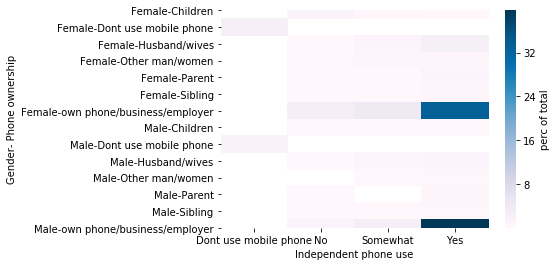

None

Default widgets: Phone ownership, Independent phone use
Hidden widgets: None



### WORK

#### 89.72% of women work or have permission to work; and 30.19% are the main income earner in their homes, compared to 70.98% of men.

##### Permission to work vs. Main income earner by Gender

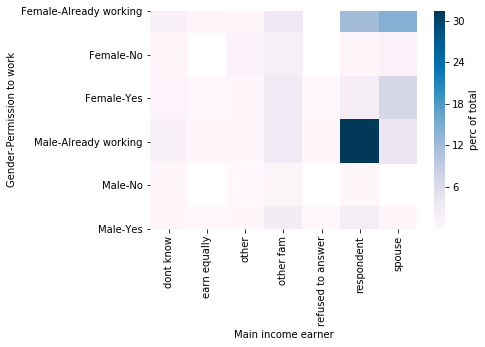

None

Default widgets: Permission to work, Main income earner
Additional widgets: Migrant worker identity, Allow spouse to work, Income frequency of spouse



### EARNINGS

#### 10.3% of women had the possibility to raise 1/20 GNI in case of need.

Default widgets: Earning frequency, Possibility to raise 1/20 GNI (Gross National Income)
Additional widgets: None
2 widgets: ['Earning frequency', 'Possibility to raise 1/20 GNI (Gross National Income)']



### FINANCIAL INCLUSION

#### 7.45% of the women who own a mobile or bank account (33.56% of all interviewed women) claimed to have money taken from their accounts.

##### Bank vs. Money taken from account by Gender

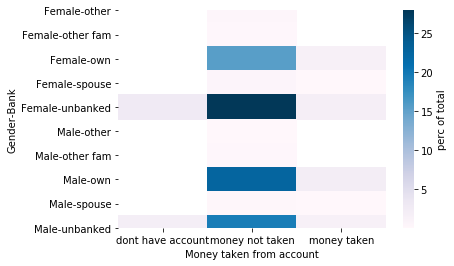

None

Default widgets: Bank, Mobile Money, Money taken from account
Additional widgets: Informal financial usage, Permission to open bank



### HOUSEHOLD DECISION MAKING

#### 62.18% of women have influence on decisions regarding their children, and 86.76% on decisions regarding savings goals.

##### Children decision maker vs. Savings goal decision maker by Gender

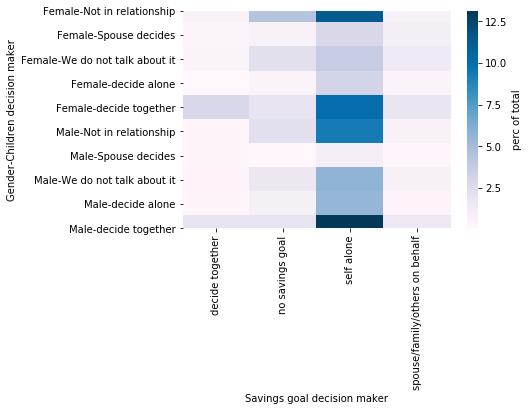

None

Default widgets: Children decision maker, Savings goal decision maker
Additional widgets: Spending decision maker, Savings goal influence, Land ownership, Land decision maker



### DEMOGRAPHICS

##### Age Group vs. Urbanicity by Gender

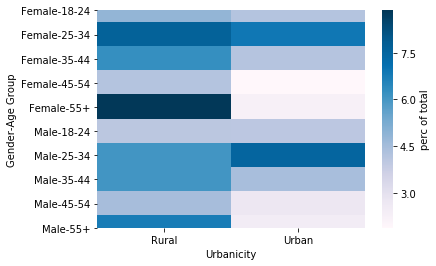

None

Default widgets: Gender, Age Group, Urbanicity, $2.50 PPP Poverty line
Additional widgets: Education, Main language, English literacy, Relationship status, Mean household size, Region


In [225]:
display(Markdown('### PHONE USAGE'))
display(Markdown(f'#### {phone_use_perc_women}% of women who own a phone declared independent phone usage, compared to {phone_use_perc_men}% of men who own a phone.'))
hm_phone = [' Phone ownership', 'Independent phone use']
plotHeatmap(hm_phone[0], hm_phone[1])
print('Default widgets: Phone ownership, Independent phone use')
print('Hidden widgets: None')
print()
display(Markdown(f'### WORK'))
display(Markdown(f'#### {work_permit_perc_women}% of women work or have permission to work; and {main_earner_perc_women}% are the main income earner in their homes, compared to {main_earner_perc_men}% of men.'))
hm_work = ['Permission to work', 'Main income earner']
plotHeatmap(hm_work[0], hm_work[1])
print('Default widgets: Permission to work, Main income earner')
print('Additional widgets: Migrant worker identity, Allow spouse to work, Income frequency of spouse')
print()
display(Markdown(f'### EARNINGS'))
display(Markdown(f'#### {gni_raise_perc_women}% of women had the possibility to raise 1/20 GNI in case of need.'))
print('Default widgets: Earning frequency, Possibility to raise 1/20 GNI (Gross National Income)')
print('Additional widgets: None')
print(len(earning_spending), 'widgets:', earning_spending)
print()
display(Markdown(f'### FINANCIAL INCLUSION'))
display(Markdown(f'#### {money_taken_women_owner_perc}% of the women who own a mobile or bank account ({mobile_money_perc_women+bank_perc_women}% of all interviewed women) claimed to have money taken from their accounts.'))
hm_fin = ['Bank', 'Money taken from account']
plotHeatmap(hm_fin[0], hm_fin[1])
print('Default widgets: Bank, Mobile Money, Money taken from account')
print('Additional widgets: Informal financial usage, Permission to open bank')
print()
display(Markdown(f'### HOUSEHOLD DECISION MAKING'))
display(Markdown(f'#### {children_decision_perc_women}% of women have influence on decisions regarding their children, and {savings_decision_perc_women}% on decisions regarding savings goals.'))
hm_decision = ['Children decision maker', 'Savings goal decision maker']
plotHeatmap(hm_decision[0], hm_decision[1])
print('Default widgets: Children decision maker, Savings goal decision maker')
print('Additional widgets: Spending decision maker, Savings goal influence, Land ownership, Land decision maker')
print()
display(Markdown(f'### DEMOGRAPHICS'))
hm_demo = ['Age Group', 'Urbanicity']
plotHeatmap(hm_demo[0], hm_demo[1])
print('Default widgets: Gender, Age Group, Urbanicity, $2.50 PPP Poverty line')
print('Additional widgets: Education, Main language, English literacy, Relationship status, Mean household size, Region')

In [18]:
sql = f'''
    
    WITH a as (
    SELECT {indicator}, finalweight,
    FROM {table}
    WHERE Gender = {gender}
    ), b as (
    SELECT t.*
    FROM a
    CROSS JOIN LATERAL (
    VALUES (a.{indicator}, '{indicator}', a.finalweight)
    ) AS t(answer, indicator, finalweight)
    ), c as (
    SELECT answer, indicator,
    SUM(finalweight) AS value,
    count(answer) AS responders
    FROM b
    WHERE answer NOT IN (' ','nan','REFUSED') AND weight_ind != 'NaN'
    GROUP BY answer, indicator
    )
    SELECT c.answer, c.indicator,
    (c.value * 100 / SUM(c.value) OVER(PARTITION BY indicator)) as value,
    SUM(c.responders) OVER() AS responders
    FROM c
    ORDER BY answer DESC
'''

Signature:
pd.read_sql(
    sql,
    con,
    index_col=None,
    coerce_float=True,
    params=None,
    parse_dates=None,
    columns=None,
    chunksize=None,
)
Docstring:
Read SQL query or database table into a DataFrame.

This function is a convenience wrapper around ``read_sql_table`` and
``read_sql_query`` (for backward compatibility). It will delegate
to the specific function depending on the provided input. A SQL query
will be routed to ``read_sql_query``, while a database table name will
be routed to ``read_sql_table``. Note that the delegated function might
have more specific notes about their functionality not listed here.

Parameters
----------
sql : string or SQLAlchemy Selectable (select or text object)
    SQL query to be executed or a table name.
con : SQLAlchemy connectable (engine/connection) or database string URI
    or DBAPI2 connection (fallback mode)

    Using SQLAlchemy makes it possible to use any DB supported by that
    library. If a DBAPI2 object, only sql